In [2]:
# --- Task 1: Load and Explore the Dataset ---
# Step 1: Importing libraries
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Loading Iris data from sklearn
iris = load_iris(as_frame=True)

# Step 3: Creating a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Step 4: Adding the target column (species)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Step 5: Show first 5 rows
print("First 5 rows of the Iris dataset:")
print(df.head())

# Step 6: Checking data types
print("\nData Types:")
print(df.dtypes)

# Step 7: Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 8: Clean the data by handling missing values
df_dropped = df.dropna()
print(f"\nRows before cleaning: {len(df)}, after dropna(): {len(df_dropped)}")

# Step 9: Save file as CSV file
df.to_csv("iris.csv", index=False)
print("\nIris dataset saved as 'iris.csv'")

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Data Types:
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Rows before cleaning: 150, after dropna(): 150

Iris dataset saved as 'iris.csv'


In [4]:
# --- Task 2: Basic Data Analysis ---
# 1. Compute basic statistics
print("Basic Statistics:")
print(df.describe())

# Calculate median and standard deviation separately
print("\nMedian Values:")
print(df.median(numeric_only=True))

print("\nStandard Deviations:")
print(df.std(numeric_only=True))

# Group by species and compute the mean of each numeric column
print("\nMean values grouped by species:")
grouped_means = df.groupby('species').mean(numeric_only=True)
print(grouped_means)


# Patterns or interesting findings
print("\n💡 Observations:")
print("- Setosa species has smaller petal length and width compared to Versicolor and Virginica.")
print("- Virginica tends to have the largest sepal and petal measurements overall.")

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Median Values:
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Standard Deviations:
sepal

<ipython-input-4-3bbb9bdd8f69>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = df.groupby('species').mean(numeric_only=True)


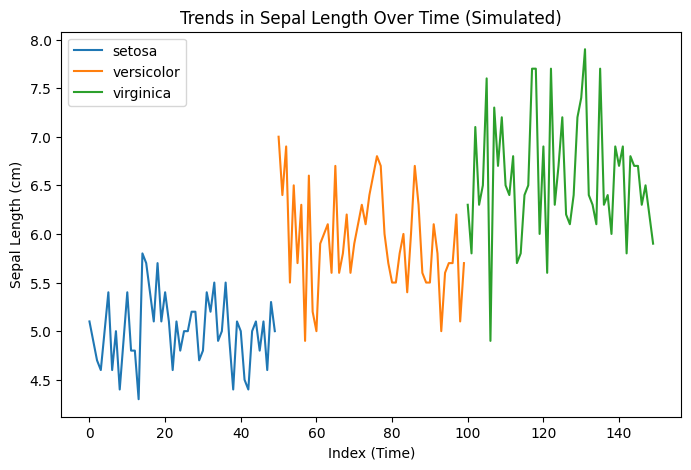

<ipython-input-8-bf6012df2d7e>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, ci=None, palette='viridis')
<ipython-input-8-bf6012df2d7e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, ci=None, palette='viridis')


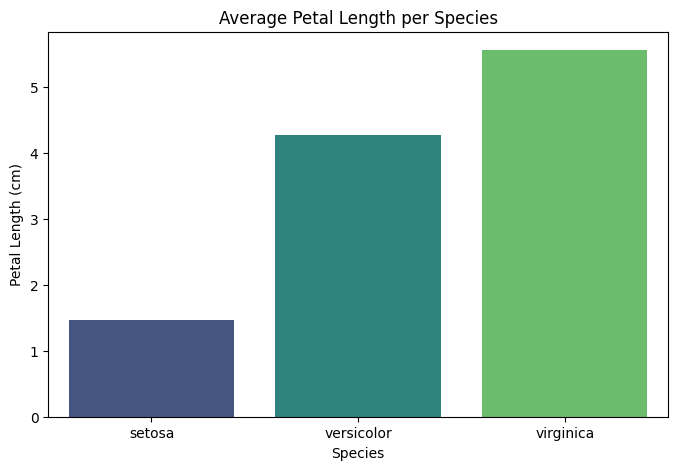

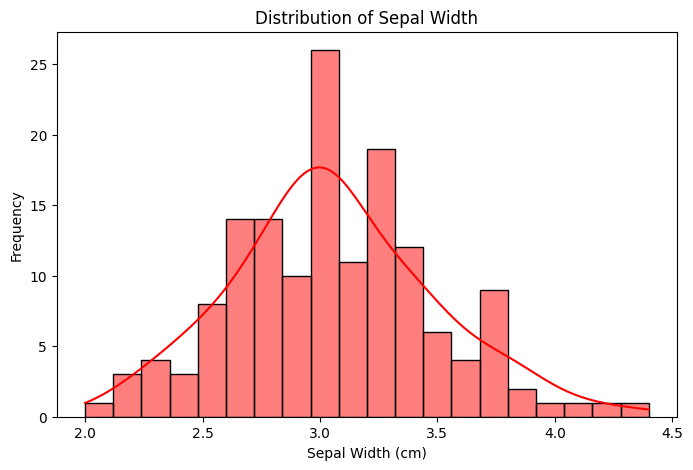

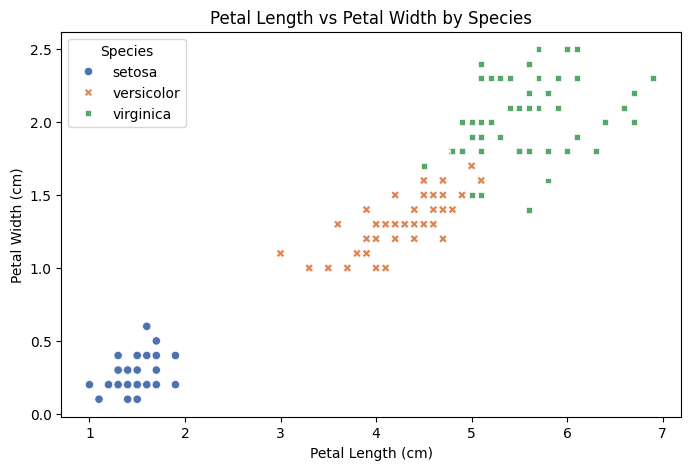

In [8]:
# --- Task 3: Data Visualization ---
# 1. Line Chart: Trends over time (randomly simulated time-series data for demonstration)
df_time = df.copy()
df_time['index'] = range(len(df_time))  # Simulating an index column as time
plt.figure(figsize=(8, 5))
for species in df_time['species'].unique():
    subset = df_time[df_time['species'] == species]
    plt.plot(subset['index'], subset['sepal length (cm)'], label=species)
plt.title('Trends in Sepal Length Over Time (Simulated)')
plt.xlabel('Index (Time)')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.show()

# 2. Bar Chart: Comparison of petal length across species
plt.figure(figsize=(8, 5))
sns.barplot(x='species', y='petal length (cm)', data=df, ci=None, palette='viridis')
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

# 3. Histogram: Distribution of sepal width
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal width (cm)'], kde=True, bins=20, color='red')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter Plot: Relationship between petal length and petal width
plt.figure(figsize=(8, 5))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', style='species', palette='deep', data=df)
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

# --- Additional Notes ---
# - All plots are customized with titles, axis labels, and legends where applicable.
# - The line chart uses a simulated "time" index for demonstration purposes.
# - Insights from the data analysis are printed in the console.
